In [1]:
import warnings

import pandas as pd
import numpy as np

from functions.loading import load_data

from functions.preprocessing import outliers_preprocess
from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


c:\Users\thibaud.barreau\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [87]:
path_rawdata = 'data/raw_data/'
path_models = 'models/proprietary_data/'
path_Benchmark = 'Benchmark/'
path_results = 'results/proprietary_data/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/proprietary_data/'
path_plot = 'results/proprietary_data/plot/'
# ,"CF3_log", "CF123_log"
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]
models = {
        "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "seed":0,
    "n_iter":10,
    "extended_features": [
            "Revenue_log",
            "EMP_log",
            "Asset_log",
            "NPPE_log",
            "CapEx_log",
            "Age",
            "CapInten",
            "GMAR",
            "Leverage",
            "Price",
            "FuelIntensity",
            "FiscalYear",
            "ENEConsume_log",
            "ENEProduce_log",
            "INTAN_log",
            "AccuDep_log",
            "COGS_log",
        ],
    "selec_sect":["GICSSubInd", "GICSInd", "GICSGroup"],
    "fill_grp":"",
    "old_pipe":False,  
    "cross_val": False,
}

Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

In [3]:
preprocessed_dataset = load_data(path_rawdata, save=True)

In [4]:
preprocessed_dataset["CF1"] = preprocessed_dataset["CF1_merge"] 
preprocessed_dataset["CF2"] = preprocessed_dataset["CF2_merge"] 
preprocessed_dataset["CF3"] = preprocessed_dataset["CF3_merge"] 
preprocessed_dataset["CF123"] = preprocessed_dataset["CF123_merge"] 

threshold_under=1.5
threshold_over=2.5
for target in ["CF1_merge", "CF2_merge", "CF3_merge", "CF123_merge"] : 
    preprocessed_dataset = outliers_preprocess(preprocessed_dataset, target, threshold_under=threshold_under, threshold_over=threshold_over)


In [5]:
# threshold_under=1.5
# threshold_over=2.5

# scope = "CF1_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF2_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF3_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF123_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")

# Base example

In [7]:
# test de base 28minutes ? 
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="restriction_CF123_test_base_2822223",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    # Summary_Final_train=Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=False,
    save=False,
)

CF1_log
Files not found, constructing them
preprocessing done


2023/08/02 18:00:33 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 18:00:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 19
Created version '19' of model 'xgboost'.
2023/08/02 18:00:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 18:00:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 47
Created version '47' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002487 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/02 18:01:00 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 18:01:07 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 47
Created version '47' of model 'lgbm'.


modelisation done
CF2_log
Using pre created preprocessed files
preprocessing done


2023/08/02 18:01:14 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 18:01:21 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 20
Created version '20' of model 'xgboost'.
2023/08/02 18:01:31 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 18:01:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 48
Created version '48' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/02 18:01:39 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 18:01:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 48
Created version '48' of model 'lgbm'.


modelisation done
CF3_log
Using pre created preprocessed files
preprocessing done


2023/08/02 18:01:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 18:01:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 21
Created version '21' of model 'xgboost'.
2023/08/02 18:02:07 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 18:02:13 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 49
Created version '49' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001539 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/02 18:02:14 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 18:02:21 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 49
Created version '49' of model 'lgbm'.


modelisation done
CF123_log
Using pre created preprocessed files
preprocessing done


2023/08/02 18:02:27 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 18:02:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 22
Created version '22' of model 'xgboost'.
2023/08/02 18:02:41 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 18:02:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 50
Created version '50' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001526 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/02 18:02:49 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 18:02:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 50


modelisation done


Created version '50' of model 'lgbm'.


In [8]:
best_scores


[0.5225673205853884, 0.40811509811421237, 0.85109105089482, 0.5229286278975259]

In [ ]:
# Initial grid
# [0.718863070915766, 
#  0.5436700671297622, 
#  1.0526040758198016, 
#  0.6342521777936404]

# just using inf threshold
# [0.7018124871336399, # better 
#  0.5313084292372081, # better 
#  1.0378449220709638, # better 
#  0.6290781450386738] # better 


# CF123 comparison : 
# [0.7234012636609329, # worse
#  0.5650729256715145, # worse
#  1.0565618159862236, # worse
#  0.6342521777936404] # same (normal)

# Outliers removal before split, per target
# [0.5283557509005923,
#  0.42400993566684136,
#  0.8966142053519602,
#  0.5533837847917039]

# global removal (remove line for all scopes instead of per scopes) : 
# [0.4940438778909675, # best
#  0.4899781334699924,  
#  0.9720296280063642,  
#  0.5320520022173726]  
# outlier before (drop unknown diff) 
# [0.5233991620098789,
# 0.40811509811421237, # best
# 0.85109105089482,    # best
# 0.5229286278975259]  # best

# outlier before (replace na)
# [0.7018124871336399,
#  0.5313084292372081,
#  1.0378449220709638,
#  0.6290781450386738]

# outlier before (remove companies)
# [0.5309444158752653, 
# 0.41053559533269984, #
# 0.912072400444415,
# 0.556608237281898]


[0.5283557509005923,
 0.42400993566684136,
 0.8966142053519602,
 0.5533837847917039]

# Restriction to CF123 filter

In [37]:
# test restricted to CF123
targets = ["CF1_log_CF123","CF2_log_CF123","CF3_log_CF123", "CF123_log"]

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="restriction_CF123_test_uniform test_CVTrue",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    # Summary_Final_train =Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=False,
    save=False,
)

CF1_log_CF123


Using pre created preprocessed files
preprocessing done


2023/08/01 12:03:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:03:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 38
Created version '38' of model 'xgboost'.
2023/08/01 12:03:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:03:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 38
Created version '38' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:03:56 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:03:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 38
Created version '38' of model 'lgbm'.


modelisation done
CF2_log_CF123
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:07 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 39
Created version '39' of model 'xgboost'.
2023/08/01 12:04:15 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:04:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 39
Created version '39' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:04:19 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:04:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 39
Created version '39' of model 'lgbm'.


modelisation done
CF3_log_CF123
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:30 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 40
Created version '40' of model 'xgboost'.
2023/08/01 12:04:39 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:04:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 40
Created version '40' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001804 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:04:42 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:04:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 40
Created version '40' of model 'lgbm'.


modelisation done
CF123_log
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:54 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 41
Created version '41' of model 'xgboost'.
2023/08/01 12:05:03 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:05:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 41
Created version '41' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:05:06 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:05:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 41


modelisation done


Created version '41' of model 'lgbm'.


In [38]:
best_scores # with CF123 standardization
# no CV [0.7234012636609329,
#  0.5650729256715145,
#  1.0565618159862236,
#  0.6342521777936404]

[0.7234012636609329,
 0.5650729256715145,
 1.0565618159862236,
 0.6342521777936404]

# Test seed influence

In [9]:
from functions.preprocessing import custom_train_split
from functions.results import  metrics

training_parameters["cross_val"] = True

In [88]:
# Analyse variance seed model
# 22h, à ne pas reproduire à la maison

targets = ["CF1_log_CF123","CF2_log_CF123","CF3_log_CF123", "CF123_log"]
name_experiment = "analysis_seed_model_influence_00"

best_scores = {
    "CF1_log_CF123" : [],
    "CF2_log_CF123" : [],
    "CF3_log_CF123" : [],
    "CF123_log" : [],
}
best_stds = {
    "CF1_log_CF123" : [],
    "CF2_log_CF123" : [],
    "CF3_log_CF123" : [],
    "CF123_log" : [],
}

for target in targets:
    print(target)
    (
        X_train,
        y_train,
        X_test,
        y_test,
        df_test,
    ) = custom_train_split(
        preprocessed_dataset,
        path_Benchmark,
        path_intermediary,
        target,
        # threshold_under=training_parameters["threshold_under"],
        # threshold_over=training_parameters["threshold_over"],
        extended_features=training_parameters["extended_features"],
        selec_sect=training_parameters["selec_sect"],
        fill_grp=training_parameters["fill_grp"],
        old_pipe=training_parameters["old_pipe"],
        open_data=False,
    )
    # seed = training_parameters["seed"]
    n_iter = training_parameters["n_iter"]
    print("preprocessing done")
    for seed in range(10) : 
        test_scores = []
        test_stds = []
        for i, (model_name, model) in enumerate(models.items()):
        # with mlflow.start_run() as run:
            model_i = model(
                X_train,
                y_train,
                cross_val=training_parameters["cross_val"],
                n_jobs=-1,
                verbose=0,
                n_iter=n_iter,
                seed=seed,
            )
            y_pred = model_i.predict(X_test)

            summary_global, rmse, std = metrics(y_test, y_pred, Summary_Final, target, model_name)
            ensemble.append(model_i)
            test_scores.append(rmse)
            test_stds.append(std)

        best_scores[target].append(test_scores[test_scores.index(min(test_scores))])
        best_stds[target].append(test_stds[test_scores.index(min(test_scores))])
    print("modelisations done")


CF1_log_CF123
Using pre created preprocessed files
preprocessing done
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002148 seconds

In [94]:
target = "CF1_log_CF123"
best_scores[target]

[0.5331540734213799,
 0.5360074831899618,
 0.5382189058069249,
 0.5298694693143241,
 0.5340767842482714,
 0.5352108983832541,
 0.541092377134454,
 0.5307035015735889,
 0.5363584396724036,
 0.5352781513752242]

CF3_log_CF123
0.8592018955553286  +/-  0.002747998731523164 (variance due to seed)
0.8592018955553286  +/-  0.07380153278094363 (variance due to test set)
rapport seed VS test :  26.856465373998493


<AxesSubplot:>

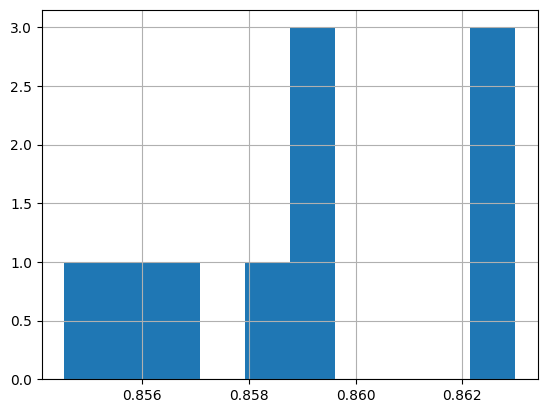

In [124]:
target = targets[2] #31, 38, 26, 64
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]), "(variance due to seed)")
print(np.mean(best_scores[target]), " +/- ", np.mean(best_stds[target]), "(variance due to test set)")
print("rapport seed VS test : ", np.mean(best_stds[target])/np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

CF2_log_CF123
0.428748571285022  +/-  0.002730458040318186


<AxesSubplot:>

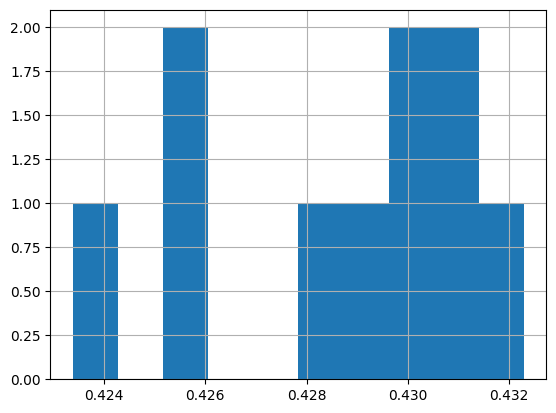

In [91]:
target = targets[1]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

CF3_log_CF123
0.8592018955553286  +/-  0.002747998731523164


<AxesSubplot:>

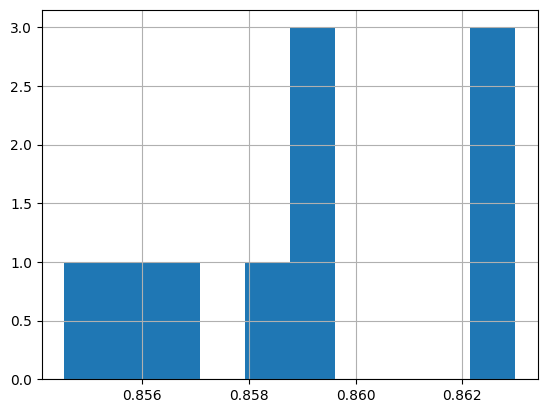

In [92]:
target = targets[2]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

CF123_log
0.5235719239793513  +/-  0.000840491431264687


<AxesSubplot:>

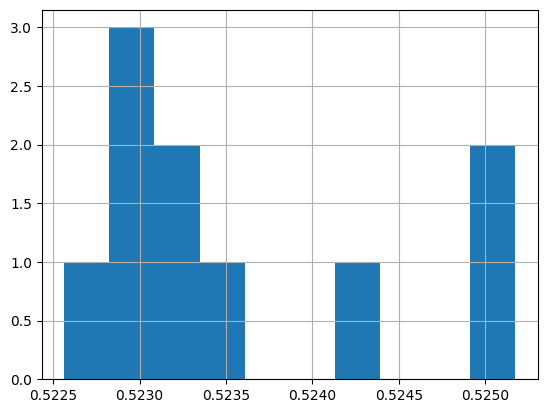

In [93]:
target = targets[3]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

In [113]:
X_train.shape #(11056, 281)
X_train.index.nunique()
X_train.join(preprocessed_dataset[["CDP_CF1", "CDP_CF2", "CDP_CF3", "CDP_CF123","country_sector"]]) # (11056, 281)

,Revenue_log,EMP_log,Asset_log,NPPE_log,CapEx_log,Age,CapInten,GMAR,Leverage,Price,...,GICSGroup__4530.0,GICSGroup__5010.0,GICSGroup__5020.0,GICSGroup__5510.0,GICSGroup__6010.0,GICSGroup__6020.0,CDP_CF1,CDP_CF2,CDP_CF3,country_sector
397,7.897134,2.064458,9.350751,10.112440,10.831741,9.702434,0.027397,69.025367,0.066759,23.782510,...,False,False,False,False,False,False,NaN,NaN,NaN,Oman_40203030.0
398,8.160991,1.812913,9.075741,10.112377,10.831755,9.388727,0.002035,69.921549,0.027234,26.711392,...,False,False,False,False,False,False,NaN,NaN,NaN,Oman_40203030.0
1768,7.549280,0.000000,9.267156,10.114717,10.831723,20.648791,1.999192,50.175630,0.146231,NaN,...,False,False,False,False,True,False,NaN,NaN,NaN,Vietnam_20103010.0
1769,7.668216,0.000000,9.280163,10.115113,10.831630,21.127492,1.623123,63.207330,0.172121,NaN,...,False,False,False,False,True,False,NaN,NaN,NaN,Vietnam_20103010.0
2324,8.466195,1.799341,9.424651,10.113606,10.831738,36.700000,0.126503,67.028713,0.000000,23.588994,...,False,False,False,False,False,False,NaN,NaN,NaN,Sweden_40203010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572907,8.916332,3.940367,9.394843,10.163364,10.830621,15.574946,1.956778,25.803950,0.391945,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,Hong Kong_20303010.0
573560,8.880801,3.301247,9.239189,10.131997,10.831464,12.810310,0.788027,22.918570,0.170906,31.834461,...,False,False,False,False,False,False,NaN,NaN,NaN,Australia_60101010.0
573561,8.980481,3.301247,9.233544,10.132808,10.831082,13.699213,0.652917,24.713730,0.182120,21.101497,...,False,False,False,False,False,False,NaN,NaN,NaN,Australia_60101010.0
573805,8.811566,4.540342,10.272534,10.435779,10.826911,25.557205,22.103862,48.059850,0.617715,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,Turkey_40203010.0


# Test weighted OLS

In [55]:
import statsmodels.api as sm

In [59]:
range(1,8)

range(1, 8)

In [60]:
# Analyse variance seed model

targets = ["CF1_log_CF123","CF2_log_CF123","CF3_log_CF123", "CF123_log"]
name_experiment = "test_weighted_OLS"

best_scores = []
best_stds = []

for target in targets:
    print(target)
    test_scores = []
    test_stds = []
    (
        X_train,
        y_train,
        X_test,
        y_test,
        df_test,
    ) = custom_train_split(
        preprocessed_dataset,
        path_Benchmark,
        path_intermediary,
        target,
        extended_features=training_parameters["extended_features"],
        selec_sect=training_parameters["selec_sect"],
        fill_grp=training_parameters["fill_grp"],
        old_pipe=training_parameters["old_pipe"],
        open_data=False,
    )
    seed = training_parameters["seed"]
    n_iter = training_parameters["n_iter"]
    print("preprocessing done")
    weights = [1 for i in range(len(y_train))]

    for i, (model_name, model) in enumerate(models.items()):
        model_ols = sm.WLS(y_train.values, X_train.values, weights=weights).fit()
        y_pred = model_i.predict(X_test.values)

        summary_global, rmse, std = metrics(y_test, y_pred, Summary_Final, target, model_name)
        # ensemble.append(model_i)
        test_scores.append(rmse)
        test_stds.append(std)

    best_scores.append(test_scores[test_scores.index(min(test_scores))])
    best_stds.append(test_stds[test_scores.index(min(test_scores))])
    print("modelisations done")


CF1_log_CF123
Using pre created preprocessed files
preprocessing done


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [48]:
a.shape[0]

561331

In [49]:
a = preprocessed_dataset[(preprocessed_dataset.CF1.isna()) & (preprocessed_dataset.CF2.isna()) & (preprocessed_dataset.CF3.isna())]
a[preprocessed_dataset.ENEConsume.notna()].shape[0]/a.shape[0]*100

0.975894792911847

# Test weights

In [61]:
class RmseObjectiveL2(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)

        der1, der2 = [], []
        
        for index in range(len(targets)):
            der1.append(targets[index] - approxes[index])
            der2.append(-1)

            if weights is not None:
                der1[index] *= weights["weight"]
                der2[index] *= weights["weight"]


        for corpo_id in weights.FinalEikonID.unique() : 
            lst_idx = weights[weights.FinalEikonID == corpo_id].index
            # corpo_der_sum = sum([der1[i] for i in range(lst_idx)]) # use L1 norm, simplest to implement ? 
            corpo_der_sum = np.sqrt(sum([der1[i]**2 for i in range(lst_idx)])) # use L2 norm, better properties ? 
            der1[i] = der1[i] / corpo_der_sum

        result = np.array([der1, der2]).reshape(-1, 2)
        return result

In [79]:
def weight_creation(df) : 
    df["weight_reliability"] = np.ones(len(df))
    CDP_indexes = df[df[target] == df["CDP_"+target]].index
    df.loc[CDP_indexes, "weight_reliability"] = [2 for i in range(len(CDP_indexes))]

    nb_occurences = FinalEikonID.value_counts()
    df["weight_companies"] = df.apply(lambda row : 1 / nb_occurences[row["FinalEikonID"]])

    df["country_sector"] = df["CountryHQ"].astype(str) + "_" + df["GICSSubInd"].astype(str)
    nb_occurences = df["country_sector"].value_counts() 
    df["weight_country_sector"] = df.apply(lambda row : 1 / nb_occurences[row["country_sector"]])

    df["weight_final"] = df["weight_reliability"] * df["weight_companies"] * df["weight_country_sector"]
    return df


array([[1, 2],
       [3, 4],
       [5, 6]])

In [85]:
# preprocessed_dataset["country_sector"] = preprocessed_dataset["CountryHQ"].astype(str) + "_" + preprocessed_dataset["GICSSubInd"].astype(str)
preprocessed_dataset["country_sector"].value_counts() # 6103 ss groupes, why not

country_sector
Australia_15104020.0                   4930
China_20106020.0                       4383
Japan_20106020.0                       3820
United States of America_35201010.0    3604
Taiwan_45203015.0                      3314
                                       ... 
Finland_35203010.0                        1
Austria_55103010.0                        1
Sint Maarten_35202010.0                   1
Dominican Republic_50201010.0             1
Sweden_40203040.0                         1
Name: count, Length: 6103, dtype: int64

In [75]:
# preprocessed_dataset["weight_reliability"] = np.ones(len(preprocessed_dataset))
target = "CF123" #preprocessed_dataset["CDP_CF2"] = preprocessed_dataset["CDP_CF2_location"]
CDP_indexes = preprocessed_dataset[preprocessed_dataset[target] == preprocessed_dataset["CDP_"+target]].index
preprocessed_dataset.loc[CDP_indexes, "weight_reliability"] = [2 for i in range(len(CDP_indexes))]
preprocessed_dataset_CF1 = preprocessed_dataset[preprocessed_dataset[target].notna()]
preprocessed_dataset_CF1.weight_reliability.value_counts()
# CF1, 2 : 1/3 ; CF3 et 123 : un peu plus de la moitié 

weight_reliability
2.0    8760
1.0    7608
Name: count, dtype: int64